## utility tryouts
- om te bekijken hoe utilities werken en gelinkt zijn aan decisions

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import os
import sys
import re
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.display import display, HTML, clear_output, Image
import pandas as pd
from itertools import product
import math
from deepdiff import DeepDiff

In [3]:
sys.path.insert(1, "/workspaces/ou-af/problem2/")

In [4]:
# Styling notebook
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML("<style>" + styles + "</style")

css_styling()

## structuur

In [5]:
diagram = gum.InfluenceDiagram()

In [6]:
D1 = gum.LabelizedVariable("d1", "d1",["yes", "no"])
D1id = diagram.addDecisionNode(D1)
C1 = gum.LabelizedVariable("c1", "c1", ["yes", "no"])
C1id = diagram.addChanceNode(C1)


In [7]:
D2 = gum.LabelizedVariable("d2", "d2",["yes", "no"])
D2id = diagram.addDecisionNode(D2)
C2 = gum.LabelizedVariable("c2", "c2", ["yes", "no"])
C2id = diagram.addChanceNode(C2)

In [8]:
C3 = gum.LabelizedVariable("c3", "c3", ["yes", "no"])
C3id = diagram.addChanceNode(C3)

In [9]:
U1 = gum.LabelizedVariable("u1", "u1",1)
U1id = diagram.addUtilityNode(U1)

In [10]:
U2 = gum.LabelizedVariable("u2", "u2",1)
U2id = diagram.addUtilityNode(U2)

In [11]:
diagram.addArc("c1", "c2")
diagram.addArc("d1", "u1")
#diagram.addArc("d2", "c2")
diagram.addArc("d2", "u2")
diagram.addArc("c2", "u1")
diagram.addArc("d1", "c3")
diagram.addArc("c3", "d2")


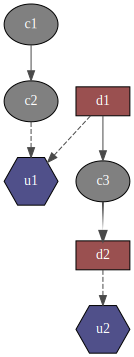

In [12]:
gnb.showInfluenceDiagram(diagram, size=60)

## configuratie

In [13]:
y, n = "yes", "no"
diagram.cpt(C1id)[{"d1":n, "c1":n}] = 0.8
diagram.cpt(C1id)[{"d1":n, "c1":y}] = 0.2
diagram.cpt(C1id)[{"d1":y, "c1":n}] = 0.2
diagram.cpt(C1id)[{"d1":y, "c1":y}] = 0.8

In [14]:
y, n = "yes", "no"
diagram.cpt(C2id)[{"c1":y, "c2":y}] = 0.99
diagram.cpt(C2id)[{"c1":n, "c2":y}] = 0.01
diagram.cpt(C2id)[{"c1":y, "c2":n}] = 0.01
diagram.cpt(C2id)[{"c1":n, "c2":n}] = 0.99


In [15]:
y, n = "yes", "no"
diagram.cpt(C3id)[{"d1":y, "c3":y}] = 0.2
diagram.cpt(C3id)[{"d1":n, "c3":y}] = 0.8
diagram.cpt(C3id)[{"d1":y, "c3":n}] = 0.8
diagram.cpt(C3id)[{"d1":n, "c3":n}] = 0.2

In [16]:
gnb.flow.row(diagram.cpt(C1id), diagram.cpt(C2id), diagram.cpt(C3id))


In [29]:
y, n = "yes", "no"
diagram.utility(U1id)[{"c2":y, "d1":y}] = 1
diagram.utility(U1id)[{"c2":n, "d1":y}] = 0
diagram.utility(U1id)[{"c2":y, "d1":n}] = 0
diagram.utility(U1id)[{"c2":n, "d1":n}] = 0
diagram.utility(U2id)[{"d2":y}] = 0
diagram.utility(U2id)[{"d2":n}] = 0


In [30]:
gnb.flow.row(diagram.utility(U1id), diagram.utility(U2id)) 

## inference

In [31]:
evs = {
#   "d1":1,
}

In [32]:
ie = gum.ShaferShenoyLIMIDInference(diagram) 
ie.setEvidence(evs)
#ie.addNoForgettingAssumption(["DecisionTestObserveHealthSwitch","DecisionReplaceSwitch", "DecisionTestObserveHealthLight", "DecisionReplaceLight"])
gnb.sideBySide(gnb.getInference(diagram,engine=ie, evs=evs, size=200))



bevindingen
- meerdere besluiten voor 1 utility is niet uit te rekenen
- utility mag geen tail zijn
- Decision geeft alleen utility door van geselecteerde waarde
- Decision wordt alleen beinvloed door eigen utility
- totaal utility is optelsom van individuele utilities
- utility waarde is bepaald door decision en dan maakt de overige (kansvariabelen) niet uit

In [33]:
jt = ie.junctionTree()
jt

<pyAgrum.pyAgrum.CliqueGraph; proxy of <Swig Object of type 'gum::CliqueGraph *' at 0xffff41477f00> >

In [ ]:
|